In [77]:
import json
import os
import nltk
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
json_files = [f for f in os.listdir('./dataset') if f.endswith('.json')]
len(json_files)

812

In [14]:
json_files[0]

'27401_27500.json'

In [36]:
tag_dict = {}

def add_tag_item(item):
    if len(item['tags']) == 0:
        return False

    # else
    tags = item['tags']
    for tag_name in tags:
        
        if tag_name not in tag_dict.keys():
            tag_dict[tag_name] = 1
        else:
            tag_dict[tag_name] += 1

NLTK_FILTERS = ['JJ', 'JJR', 'JJS', 
                'NN', 'NNS', 
                # 'RB', 'RBR', 'RBS', 
                # 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'
               ]

desc_filtered_list = []
def check_description(item):
    desc = item['description']
    if desc is None:
        return False, None
    tokens = nltk.word_tokenize(desc)
    pos_tags = [t for t in nltk.pos_tag(tokens) if t[1] in NLTK_FILTERS]
    if len(pos_tags) > 10:
        # print("in")
        item.update({'filtered_pos': pos_tags})
        desc_filtered_list.append(item)
    return True

In [37]:
for each_file_name in tqdm(json_files):
    with open(os.path.join('./dataset', each_file_name), 'r') as fp:
        d = json.load(fp)
    
    for each_item in d:
        add_tag_item(each_item)
        check_description(each_item)
    
print("desc_filtered_list length: {}".format(len(desc_filtered_list)))

100%|██████████| 812/812 [00:13<00:00, 58.79it/s]

desc_filtered_list length: 2300


In [5]:
# unique tag size

In [40]:
# frequency of tag distribtution
sorted_tag_list = sorted(tag_dict.items(), key=lambda kv: kv[1], reverse=True)
type(sorted_tag_list)

list

In [43]:
_k = []
_v = []
for k, v in sorted_tag_list[:30]:
    _k.append(k)
    _v.append(v)

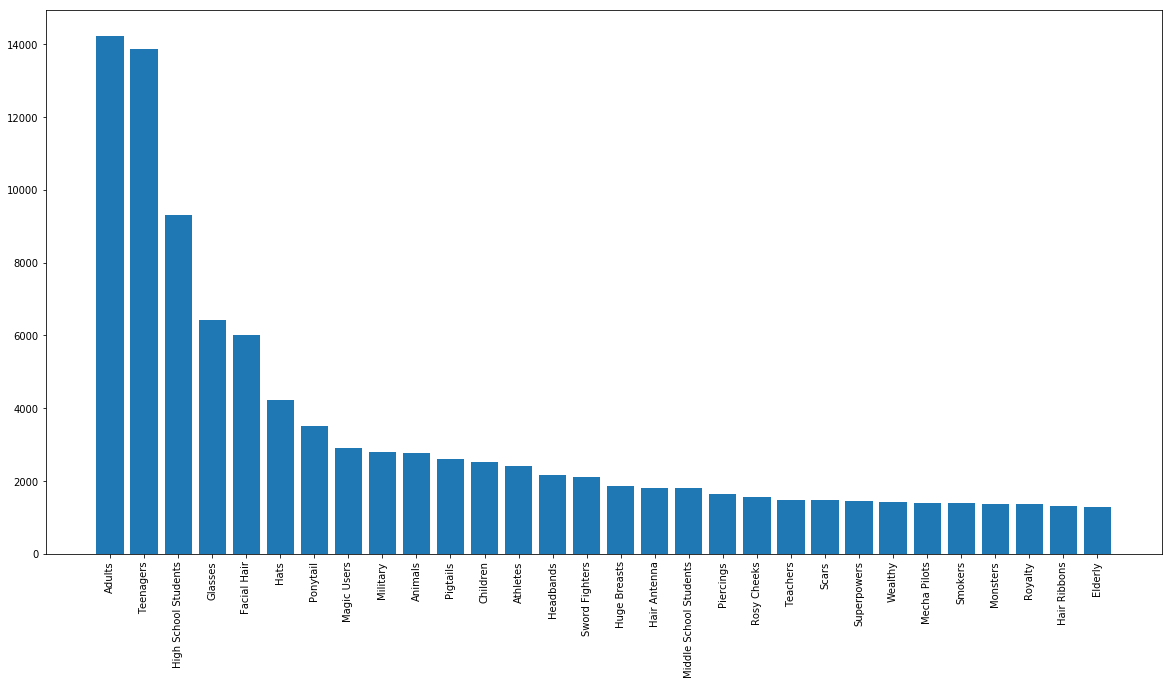

In [48]:
plt.figure(figsize=(20,10))
plt.bar(range(len(_k)), _v, align='center')
plt.xticks(range(len(_k)), _k, rotation='vertical')
plt.show()

In [13]:
t = "Allen is a young man who houses a parasitic type of Innocence within his left arm. As the result of a curse when he was younger, Allen's left eye is able to detect nearby Akuma and see the suffering souls chained to them. Despite looking fairly weedy and often being called \u2018bean sprout\u2019 by his friends, Allen is actually quite strong. He is incredibly kind and cares deeply about his friends; Allen often gets more upset than some of his peers when anyone is in danger. His master was General Cross, and he still has post-traumatic stress from his experiences with the drunk, womanizing gambler."
check_description(t)

[('is', 'VBZ'), ('young', 'JJ'), ('man', 'NN'), ('houses', 'NNS'), ('parasitic', 'JJ'), ('type', 'NN'), ('left', 'JJ'), ('arm', 'NN'), ('result', 'NN'), ('curse', 'NN'), ('was', 'VBD'), ('younger', 'JJR'), ('left', 'NN'), ('eye', 'NN'), ('is', 'VBZ'), ('able', 'JJ'), ('detect', 'VB'), ('nearby', 'JJ'), ('see', 'VB'), ('suffering', 'NN'), ('souls', 'NN'), ('chained', 'VBD'), ('looking', 'VBG'), ('fairly', 'RB'), ('weedy', 'NN'), ('often', 'RB'), ('being', 'VBG'), ('called', 'VBN'), ('‘', 'JJ'), ('bean', 'NN'), ('sprout', 'NN'), ('’', 'NN'), ('friends', 'NNS'), ('is', 'VBZ'), ('actually', 'RB'), ('quite', 'RB'), ('strong', 'JJ'), ('is', 'VBZ'), ('incredibly', 'RB'), ('kind', 'NN'), ('cares', 'NNS'), ('deeply', 'VBP'), ('friends', 'NNS'), ('often', 'RB'), ('gets', 'VBZ'), ('more', 'RBR'), ('upset', 'JJ'), ('peers', 'NNS'), ('anyone', 'NN'), ('is', 'VBZ'), ('danger', 'NN'), ('master', 'NN'), ('was', 'VBD'), ('still', 'RB'), ('has', 'VBZ'), ('post-traumatic', 'JJ'), ('stress', 'NN'), ('expe

In [51]:
nltk.pos_tag(["scars"])

[('scars', 'NNS')]

In [69]:
# Scope for "JJ" of tags
_k = []
_v = []
for k, v in tqdm(sorted_tag_list):
    p_tag = nltk.pos_tag([k])[0][1]
    if p_tag in ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']:
        _k.append(k)
        _v.append(v)
print("key length : {}".format(len(_k)))
print("value length : {}".format(len(_v)))

100%|██████████| 413/413 [00:00<00:00, 3613.80it/s]

key length : 25
value length : 25


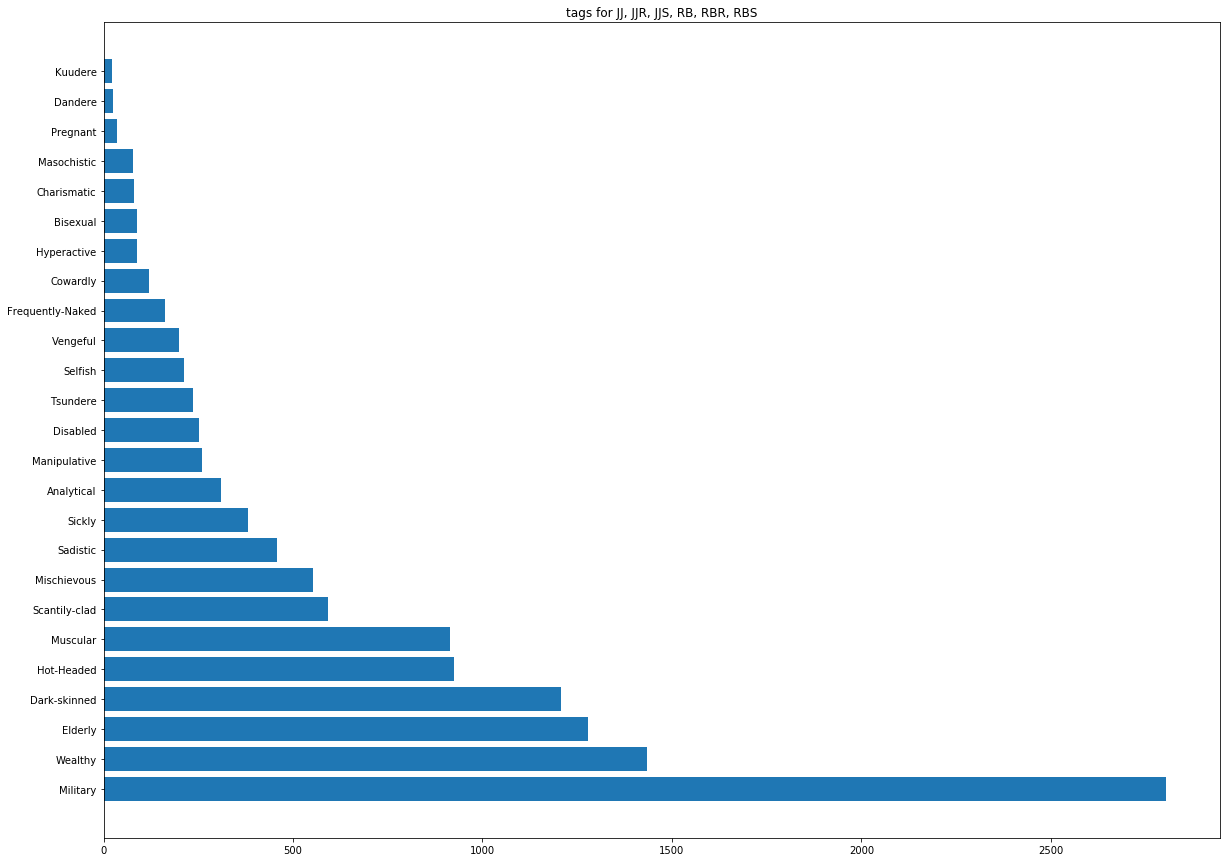

['Military', 'Wealthy', 'Elderly', 'Dark-skinned', 'Hot-Headed', 'Muscular', 'Scantily-clad', 'Mischievous', 'Sadistic', 'Sickly', 'Analytical', 'Manipulative', 'Disabled', 'Tsundere', 'Selfish', 'Vengeful', 'Frequently-Naked', 'Cowardly', 'Hyperactive', 'Bisexual', 'Charismatic', 'Masochistic', 'Pregnant', 'Dandere', 'Kuudere']


In [70]:
plt.figure(figsize=(20,15))
plt.title('tags for JJ, JJR, JJS, RB, RBR, RBS')
plt.barh(range(len(_k)), _v, align='center')
plt.yticks(range(len(_k)), _k)
plt.show()
print(_k)

In [71]:
# Scope for "NN" of tags
_k = []
_v = []
for k, v in tqdm(sorted_tag_list):
    p_tag = nltk.pos_tag([k])[0][1]
    if p_tag in ['NN', 'NNS']:
        _k.append(k)
        _v.append(v)
print("key length : {}".format(len(_k)))
print("value length : {}".format(len(_v)))

100%|██████████| 413/413 [00:00<00:00, 3115.42it/s]

key length : 368
value length : 368


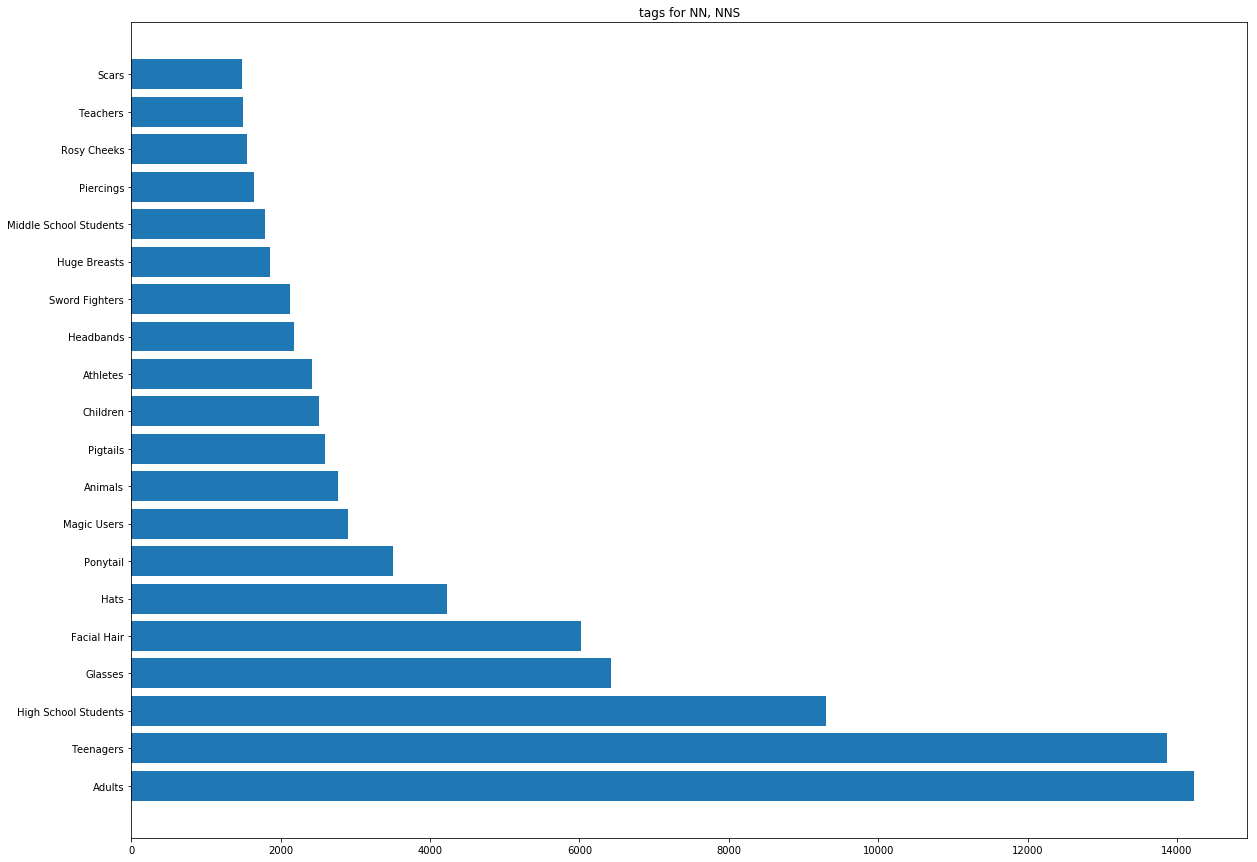

['Adults', 'Teenagers', 'High School Students', 'Glasses', 'Facial Hair', 'Hats', 'Ponytail', 'Magic Users', 'Animals', 'Pigtails', 'Children', 'Athletes', 'Headbands', 'Sword Fighters', 'Huge Breasts', 'Middle School Students', 'Piercings', 'Rosy Cheeks', 'Teachers', 'Scars']


In [72]:
plt.figure(figsize=(20,15))
plt.title('tags for NN, NNS')
plt.barh(range(len(_k[:20])), _v[:20], align='center')
plt.yticks(range(len(_k[:20])), _k[:20])
plt.show()
print(_k[:20])

In [73]:
desc_filtered_list[0]

{'tags': ['Youkai',
  'Reporters',
  'Nekomata',
  'Manipulative',
  'Hats',
  'Cats',
  'Animals',
  'Agents of the Afterlife'],
 'image_url': 'https://www.anime-planet.com/images/characters/goban-hozuki-no-reitetsu-58655.jpg?t=1395891182',
 'description': "A sly, scheming reporter who is always on the lookout for a trashy scoop. Originally a pet cat kept by a suicidal prostitute, Goban evolved into a nekomata\xa0and took employment at one of Hell's news publishing companies.",
 'gender': 'Male',
 'hair_color': 'White',
 'love_rank': '27,535',
 'name': 'Goban',
 'filtered_pos': [('reporter', 'NN'),
  ('lookout', 'NN'),
  ('trashy', 'JJ'),
  ('scoop', 'NN'),
  ('pet', 'NN'),
  ('cat', 'NN'),
  ('suicidal', 'JJ'),
  ('prostitute', 'NN'),
  ('nekomata', 'NN'),
  ('employment', 'NN'),
  ('news', 'NN'),
  ('publishing', 'NN'),
  ('companies', 'NNS')]}

In [74]:
def save_image_from_url(image_full_path, url):
    with open(image_full_path,'wb') as fp:
        fp.write(requests.get(url).content)

In [84]:
search_keyword = "Wealthy"
IMAGE_FOLDER_PATH = "./images/{}".format(search_keyword)
if not os.path.exists(IMAGE_FOLDER_PATH):
    os.mkdir(IMAGE_FOLDER_PATH)

tmp_list = []
for each_item in tqdm(desc_filtered_list):
    if search_keyword in each_item['tags'] and each_item['image_url'] is not None:
        tmp_list.append(each_item)
        image_full_path = "{}/{}.jpg".format(IMAGE_FOLDER_PATH, each_item['name'])
        save_image_from_url(image_full_path, each_item['image_url'])
print(len(tmp_list))

100%|██████████| 2300/2300 [02:09<00:00, 17.73it/s]

107
